# Data Visualization
EDA: exploratory data analysis
* Compute summary stats
* Generate data visualizations

## Goals of Data Visualization
1. Clearly and accurately represent data
1. Be creative, with the goal of improving readability
1. Label the units and points of interest

## Some Jargon
Charts: 2D visualization
* Plot: chart of data points (e.g. scatter plot)
* Graph: chart of math function (e.g. sine curve)

## Ways to use Matplotlib
1. Use the pyplot module: like a state machine with a "current figure"
1. Use OOP interface: maintain object references
1. Mix of the two

## Line Charts

In [1]:
import matplotlib.pyplot as plt

def line_chart_example(x, y, y3):
    plt.figure() # make a new current figure
    plt.plot(x, y, label="$y=x^2$")
    plt.plot(x, y3, label="$y=x^3$", c="purple", lw=5)
    plt.legend()
    
    # lets add some labels
    plt.title("Our First Chart in 322 :)")
    plt.xlabel("X Units")
    plt.ylabel("Y Units")
    plt.grid(True)
    
    # change the xtick locations and labels
    xtick_labels = ["zero", "one", "this is the third value in the list it is number two", "three", "four"]
    plt.xticks(x, xtick_labels, rotation=45, horizontalalignment="right") # locations, labels
    
    # you can save a figure to a file
    plt.tight_layout()
    plt.savefig("line_chart.pdf")
    plt.show()
    
# we need data
# task: add another line to our figure for y = x^3
x = list(range(5))
y = [value ** 2 for value in x]
y3 = [value ** 3 for value in x]
line_chart_example(x, y, y3)

<Figure size 640x480 with 1 Axes>

## Bar Charts

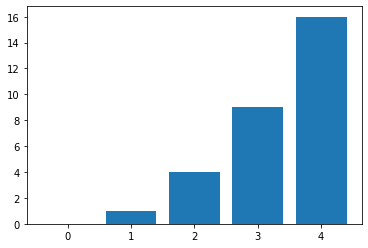

In [2]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.show()
    
bar_chart_example(x, y)

## Pie Charts

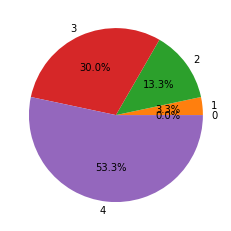

In [3]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

In [4]:
import utils
# to programmatically force a reload of utils when the code cell
# executes:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/sprint/Desktop/CPSC322/U3-Data-Analysis/JupyterNotebookFunS2/utils.py'>

In [5]:
utils.dummy_function1()
utils.dummy_function2()

## Task
Bar chart and pie chart for model year counts using `get_frequencies()`

[74, 75, 76, 77]
[1, 2, 1, 2]


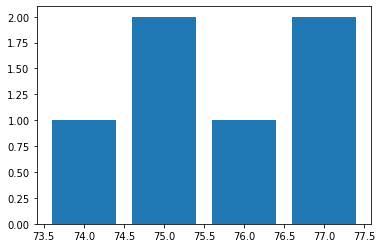

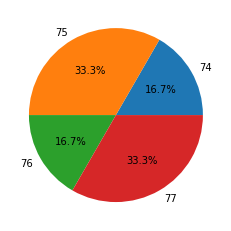

In [6]:
header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
          ["toyota corolla", 75, 2711],
          ["ford pinto", 76, 3025],
          ["toyota corolla", 77, 2789],
          ["ford mustang", 77, 3999],
          ["tesla", 74, 5000]]

# warmup 
modelyear_values, modelyear_counts = utils.get_frequencies(msrp_table, header, "ModelYear")
print(modelyear_values)
print(modelyear_counts)
bar_chart_example(modelyear_values, modelyear_counts)
pie_chart_example(modelyear_values, modelyear_counts)

## Histograms

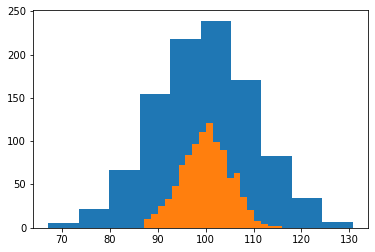

In [7]:
def histogram_example(data, data2):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10) # default is 10
    plt.hist(data2, bins=20)
    plt.show()
    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
histogram_example(normal_data, normal_data2)
# task: add another histogram to the same figure mean=100, stdev=5
# prediction: new histogram be narrower or wider than the original (blue)?

## Box Plots

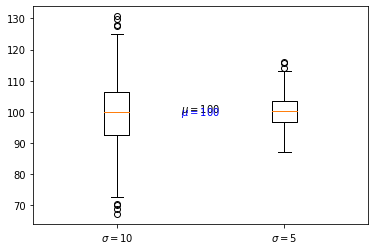

In [8]:
def box_plot_example(distributions, labels):
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # task: replace the 1 and 2 on the x axis with sigma=10 and sigma=5
    # add a parameters called labels to the function to do generally
    plt.xticks(list(range(1, len(labels) + 1)), labels)
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 100), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
box_plot_example([normal_data, normal_data2], ["$\sigma=10$", "$\sigma=5$"])

## Task
Let's create a boxplot for MSRP grouped by model year
* x-axis: model year (e.g. 74, 75, 76, 77)
* y-axis: MSRPs
* One box/whisker for each model year's MSRP distribution

Let's write `group_by(table, header, group_by_col_name)` and return a list of unique group names and a list of the corresponding group subtables

[74, 75, 76, 77]
[[['tesla', 74, 5000]], [['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], [['ford pinto', 76, 3025]], [['toyota corolla', 77, 2789], ['ford mustang', 77, 3999]]]
[[5000], [2769, 2711], [3025], [2789, 3999]]


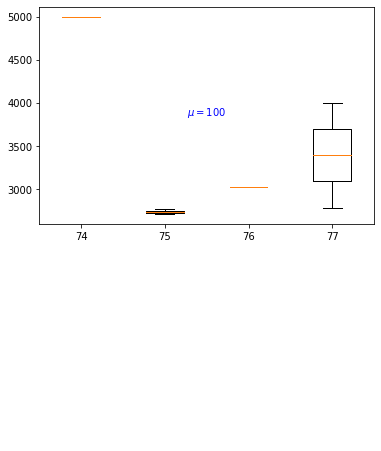

In [9]:
importlib.reload(utils)
modelyear_names, modelyear_subtables = utils.group_by(msrp_table, header, "ModelYear")
print(modelyear_names)
print(modelyear_subtables)

msrp_dists = [utils.get_column(subtable, header, "MSRP") for subtable in modelyear_subtables]
print(msrp_dists)
box_plot_example(msrp_dists, modelyear_names)

## Discretization
Converting a continuous (numeric) attribute to be discrete (categorical)
* We will implement equal-width binning (why? `plt.hist()` and `np.histogram()` use it)
* Few approaches for defining the "cutoffs" that define the bins
    * We will use N + 1 cutoffs to define N bins (same as numpy)
    * The first cutoff is the min and the last cutoff is the max
    * In between, we have half open intervals

[9, 12, 21, 36, 39, 44, 46, 47, 58, 64, 65, 67, 67, 70, 83, 87, 87, 88, 88, 88]
[9.0, 24.8, 40.6, 56.4, 72.2, 88]
plt_cutoffs: [ 9.  24.8 40.6 56.4 72.2 88. ]


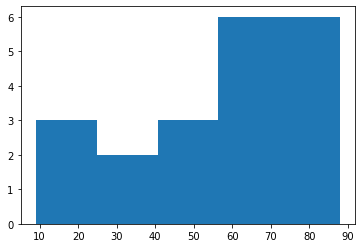

In [10]:
importlib.reload(utils)
np.random.seed(0)
values = sorted(list(np.random.choice(100, 20)))
# 20 values in [0, 100) with replacement
print(values)
# compute the N + 1 cutoffs for N=5 bins of values
cutoffs = utils.compute_equal_width_cutoffs(values, 5)
print(cutoffs)
# how do we know they are right?
# compare with matplotlib/numpy
plt_freqs, plt_cutoffs, plt_artists = plt.hist(values, bins=5)
print("plt_cutoffs:", plt_cutoffs)
# assert is used to "assert" that two values/expressions
# evaluate to True or False
# on True... program execution continues
# on False... program execution stops
#assert True == False 
# use numpy functions to test for equality when using floats
assert np.allclose(cutoffs, plt_cutoffs)
# actual , expected (solution)

## Task
Finish discretization lab tasks #2 and #3
1. Given a list of values and the number of equal-width bins to create (N), write a function to return a list of the N + 1 cutoff points.
1. Given a list of values and a list of N + 1 cutoff points, write a function to return the corresponding frequencies of the N bins.
    * `[9.0, 24.8) [24.8, 40.6) [40.6, 56.4) [56.4, 72.2) [72.2, 88]`
1. Given a list of the N bins and the N frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by plt.hist()
    * Take a look at the `plt.bar()` documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html

[3, 2, 3, 6, 6]
[3. 2. 3. 6. 6.]


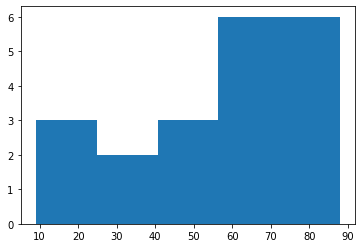

In [11]:
# task 2
freqs = utils.compute_bin_frequencies(values, cutoffs)
print(freqs)
print(plt_freqs)
assert list(freqs) == list(plt_freqs)

# task 3
plt.figure()
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge"); # ; to suppress output

## Linear Regression
* Goal is to fit a line to set of data points
* "Simple" linear regression (univariate; one independent x variable)
* y = mx + b 
* Least squares approach
    * The line has to pass though (mean x, mean y)
    * Calculate m with a formula
    * Solve for b 
    
$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

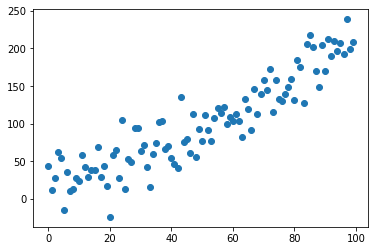

In [12]:
np.random.seed(0)
x = list(range(0, 100))
y = [value * 2 + np.random.normal(0, 25) for value in x]
plt.scatter(x, y)

In [15]:
importlib.reload(utils)
m, b = utils.compute_slope_intercept(x, y)
print("m:", m, "b:", b)
# check our work with scipy
import scipy.stats as stats 
sp_m, sp_b, sp_r, sp_r_p_val, sp_std_err = stats.linregress(x, y)
assert np.isclose(m, sp_m)
assert np.isclose(b, sp_b)

m: 1.924917458430444 b: 5.211786196055144


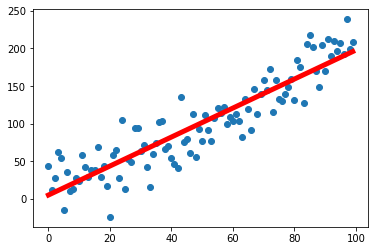

In [19]:
plt.scatter(x, y)
plt.plot([min(x), max(x)], [m * min(x) + b, m * max(x) + b], c="r", lw=5);

## Quantifying the Strength of a Linear Relationship
* See the notes on github for more details...
* Several metrics
    * Covariance
    * Correlation
    * Standard error
    * MAE, RMSE, NRMSE, etc...
* Correlation
    * $r$ in `[-1.0, 1.0]`
    * 1.0: perfect relationship: as x increases, y increases; as x decreases, y decreases
    * -1.0: perfect inverse relationship: as x increases, y decreases; as x decreases, y increases
    * 0.0: no linear relationship

In [20]:
print("r:", sp_r)

r: 0.9113097511932392
